In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc


In [42]:
#import data
df = pd.read_csv("/Users/fynnhufler/Documents/ETH/Datathon/data/skylab_instagram_datathon_dataset.csv", header = 0, sep=";")

#convert dates to numerical values
df_date_numerical = df
df_date_numerical['period_end_date'] = pd.to_datetime(df['period_end_date'])

#show head and information
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704313 entries, 0 to 704312
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period                                  704313 non-null  object        
 1   period_end_date                         704313 non-null  datetime64[ns]
 2   compset_group                           704313 non-null  object        
 3   compset                                 704313 non-null  object        
 4   business_entity_doing_business_as_name  704313 non-null  object        
 5   legal_entity_name                       676558 non-null  object        
 6   domicile_country_name                   458589 non-null  object        
 7   ultimate_parent_legal_entity_name       676558 non-null  object        
 8   primary_exchange_name                   458589 non-null  object        
 9   calculation_type                     

In [11]:
#sort data frames by different information
df_sorted_company = df.sort_values(by = 'business_entity_doing_business_as_name')
df_sorted_company.head()



,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
239772,Weekly,2022-08-06,Apparel Retail,Ecommerce Luxury Apparel Retail,24S,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,211952.0,23.0,5.0,160.0,12163.0
240260,Weekly,2017-09-16,Apparel Retail,US Softlines Analyst Interest List,24S,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,NaN,73.0,11.0,176.0,16667.0
240259,Weekly,2022-01-29,Apparel Retail,Apparel Retail,24S,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,215936.0,26.0,2.0,169.0,35580.0
240258,Weekly,2017-08-26,Apparel Retail,Ecommerce Apparel Retail,24S,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,NaN,68.0,7.0,126.0,11621.0
240257,Weekly,2019-03-09,Apparel Retail,Ecommerce Apparel Retail,24S,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,98001.0,83.0,1.0,307.0,38137.0


In [22]:
object_columns = df.select_dtypes(include=['object'])
object_columns.columns.tolist()
""" Get an overview over which differrent sectors there are"""
unique_compset_groups = df['compset_group'].unique()
print('compset groups: ', unique_compset_groups[:5])

unique_legal_entity_name = df['legal_entity_name'].unique()
print('legal names: ', unique_legal_entity_name[:5])

unique_domicile_country_name= df['domicile_country_name'].unique()
print('countries: ' , unique_domicile_country_name[:5])

unique_ultimate_parent_legal_entity_name= df['ultimate_parent_legal_entity_name'].unique()
print('parent names: ',unique_ultimate_parent_legal_entity_name[:5])



compset groups:  ['Luxury & Premium & Mainstream' 'Restaurants' 'Beverages'
 'Apparel Retail' 'Food Products']
legal names:  ['Capri Holdings' 'Restaurant Brands International' 'Pepsi'
 'Monster Energy' 'Aritzia']
countries:  ['United States of America' 'Canada' 'Australia' nan 'Italy']
parent names:  ['Capri Holdings' 'Restaurant Brands International' 'Pepsi'
 'Monster Energy' 'Aritzia']


/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_2273/1916754784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pepsi['period_end_date'] = pd.to_datetime(df_pepsi['period_end_date'])


names =  ['Gatorade' 'Mountain Dew' 'Rockstar' 'Pepsi']


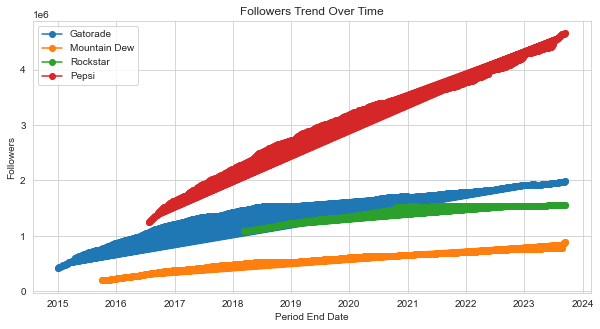

In [38]:
#CHOSE ONE MARKET ENTITY
df_pepsi = df_date_numerical[df['legal_entity_name'].str.contains('Pepsi', case=False, na=False)]
df_pepsi.head()

#ploting settings
import seaborn as sns
sns.set_style("whitegrid")  # Base style

#convert dates to numerical for plotting
df_pepsi['period_end_date'] = pd.to_datetime(df_pepsi['period_end_date'])

#seperate between different businesses
pepsi_companies = df_pepsi['business_entity_doing_business_as_name'].unique()
print("names = ", pepsi_companies)


# Plotting
plt.figure(figsize=(10, 5))
for name in pepsi_companies: 
    plt.plot(df_pepsi[df_pepsi['business_entity_doing_business_as_name'] == name]['period_end_date'], df_pepsi[df_pepsi['business_entity_doing_business_as_name'] == name]['followers'], 'o-', label=name)
plt.title('Followers Trend Over Time')
plt.xlabel('Period End Date')
plt.ylabel('Followers')
plt.legend()
plt.show()

In [46]:
# CHAT GPT RECOMMENDED THESE DIFFERENT SECTORS OF ANALYSIS, SO I IMPLEMENTED THEM AS ONE FUNCTION EACH
import scipy.stats as sc

def descriptive_stats(df, labels = ''):
    """
    This includes calculations of the mean, median and mode of different indicators like followers, likes etc.
    This is useful for limited time frames, so 
    """
    import numpy as np

    # Assume 'df' is your DataFrame
    company_names = df['business_entity_doing_business_as_name'].unique()
    followers_means = []
    followers_std = []
    followers_sum = []
    pictures_means = []
    pictures_std = []
    pictures_sum = []
    videos_means = []
    videos_std = []
    videos_sum = []
    comments_means = []
    comments_std = []
    comments_sum = []
    likes_means = []
    likes_std = []
    likes_sum = []
    counts = []

    for name in company_names:
        # Filter the DataFrame by company name
        company_data = df[df['business_entity_doing_business_as_name'] == name]

        # Followers analysis
        followers_means.append(np.mean(company_data['followers']))
        followers_std.append(np.std(company_data['followers'], ddof=1))
        followers_sum.append(np.sum(company_data['followers']))

        # Pictures analysis
        pictures_means.append(np.mean(company_data['pictures']))
        pictures_std.append(np.std(company_data['pictures'], ddof=1))
        pictures_sum.append(np.sum(company_data['pictures']))

        # Videos analysis
        videos_means.append(np.mean(company_data['videos']))
        videos_std.append(np.std(company_data['videos'], ddof=1))
        videos_sum.append(np.sum(company_data['videos']))

        # Comments analysis
        comments_means.append(np.mean(company_data['comments']))
        comments_std.append(np.std(company_data['comments'], ddof=1))
        comments_sum.append(np.sum(company_data['comments']))

        # Likes analysis
        likes_means.append(np.mean(company_data['likes']))
        likes_std.append(np.std(company_data['likes'], ddof=1))
        likes_sum.append(np.sum(company_data['likes']))

        # Counting the number of entries for each company
        counts.append(len(company_data))

    # Creating a summary DataFrame with these stats
    summary_df = pd.DataFrame({
        'Company Name': company_names,
        'Followers Mean': followers_means,
        'Followers Std': followers_std,
        'Followers Sum': followers_sum,
        'Pictures Mean': pictures_means,
        'Pictures Std': pictures_std,
        'Pictures Sum': pictures_sum,
        'Videos Mean': videos_means,
        'Videos Std': videos_std,
        'Videos Sum': videos_sum,
        'Comments Mean': comments_means,
        'Comments Std': comments_std,
        'Comments Sum': comments_sum,
        'Likes Mean': likes_means,
        'Likes Std': likes_std,
        'Likes Sum': likes_sum,
        'Count': counts
    })

    print(summary_df)

    return summary_df

def derivatives(df_date_numerical, time_frame, labels = ''):
    """
    Compute simple first derivative over time frame 
    """
    df = df_date_numerical

    for (label, time) in zip(label, time_frame):

        slope = (df[df['business_entity_doing_business_as_name'] == label & df['period_end_date'] == time_frame[1]]['followers']
                - df[df['business_entity_doing_business_as_name'] == label & df['period_end_date'] == time_frame[0]]['followers'])/(time_frame[1] - time_frame[0])
    return slope 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

def time_series_analysis(df, company_name):
    # Filter data for the selected company
    company_df = df[df['business_entity_doing_business_as_name'] == company_name]
    company_df['period_end_date'] = pd.to_datetime(company_df['period_end_date'])
    company_df.set_index('period_end_date', inplace=True)
    company_df.sort_index(inplace=True)

    # Aggregate data monthly
    monthly_likes = company_df['likes'].resample('M').sum()

    # Check stationarity
    result = adfuller(monthly_likes.dropna())
    print(f'ADF Statistic for {company_name}: {result[0]}')
    print(f'p-value: {result[1]}')

    # Build and fit a SARIMAX model
    if monthly_likes.dropna().shape[0] > 2:  # Ensure there are enough data points
        model = SARIMAX(monthly_likes, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        model_fit = model.fit(disp=False)
        print(model_fit.summary())

        # Forecast
        forecast = model_fit.forecast(steps=12)
        plt.figure()
        plt.plot(monthly_likes.index, monthly_likes, label='Historical')
        plt.plot(forecast.index, forecast, label='Forecast', color='red')
        plt.title(f'Forecast of Likes for {company_name}')
        plt.legend()
        plt.show()

def correlation_analysis(df, labels = ''):
    #labels are the things you want to compare
    params = []
    for label in labels:
        params.append(df[label])


    pd.DataFrame.corr(params)
    correlation = []

def anova_analysis(df, label = ''):
    """The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
    The test is applied to samples from two or more groups, possibly with differing sizes.
    ->   scipy.stats.f_oneway
    """
    anova = []

def t_test_analysis(df, label = ''):
    """Calculate the T-test for the means of two independent samples of scores.
    This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
    This test assumes that the populations have identical variances by default.
    ->    scipy.stats.ttest_ind
    """
    t_tests = []


In [48]:
df.shape[1]

15

In [58]:
companies = df['ultimate_parent_legal_entity_name'].unique()
for company in companies[50:60]:
    for i in range(10,df.shape[1]):
        print("sum of NA's = ", df[df['ultimate_parent_legal_entity_name'] == company].iloc[:,i].isna().sum())


sum of NA's =  299
sum of NA's =  1
sum of NA's =  15
sum of NA's =  5
sum of NA's =  1
sum of NA's =  57
sum of NA's =  1
sum of NA's =  2
sum of NA's =  1
sum of NA's =  1
sum of NA's =  162
sum of NA's =  0
sum of NA's =  24
sum of NA's =  0
sum of NA's =  0
sum of NA's =  872
sum of NA's =  0
sum of NA's =  118
sum of NA's =  0
sum of NA's =  0
sum of NA's =  0
sum of NA's =  94
sum of NA's =  96
sum of NA's =  94
sum of NA's =  94
sum of NA's =  0
sum of NA's =  0
sum of NA's =  0
sum of NA's =  0
sum of NA's =  0
sum of NA's =  3341
sum of NA's =  15
sum of NA's =  195
sum of NA's =  15
sum of NA's =  15
sum of NA's =  495
sum of NA's =  0
sum of NA's =  0
sum of NA's =  0
sum of NA's =  0
sum of NA's =  935
sum of NA's =  131
sum of NA's =  200
sum of NA's =  131
sum of NA's =  131
sum of NA's =  1306
sum of NA's =  204
sum of NA's =  278
sum of NA's =  204
sum of NA's =  204


Correlation Matrix:
           followers  pictures    videos  comments     likes
followers   1.000000  0.845564  0.838176  0.784978  0.794999
pictures    0.845564  1.000000  0.852321  0.882747  0.927350
videos      0.838176  0.852321  1.000000  0.747655  0.737187
comments    0.784978  0.882747  0.747655  1.000000  0.823010
likes       0.794999  0.927350  0.737187  0.823010  1.000000


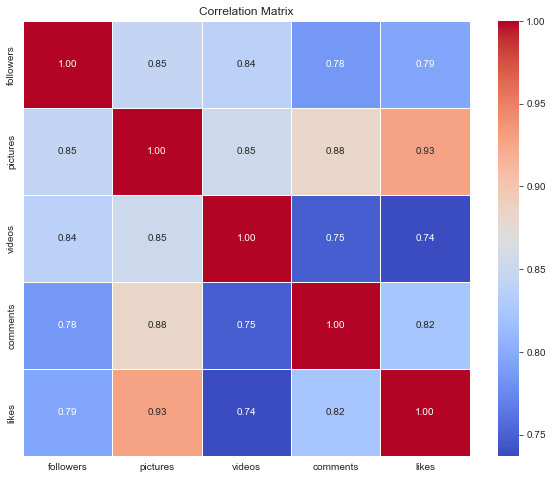

In [62]:

numeric_columns = df[df['business_entity_doing_business_as_name'] != 'all brands'].select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [79]:
sorted(df['ultimate_parent_legal_entity_name'].astype(str).unique())
do_not_use = df[df['ultimate_parent_legal_entity_name'] == ' DO NOT USE']

entities = do_not_use['business_entity_doing_business_as_name'].unique()
#entities
do_not_use


,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
79865,Weekly,2018-11-03,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,228277.0,15.0,2.0,1172.0,172008.0
79866,Weekly,2022-02-05,Luxury & Premium & Mainstream,Hard Luxury,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,2611060.0,6.0,4.0,1725.0,277254.0
79867,Weekly,2018-06-30,Luxury & Premium & Mainstream,Hard Luxury,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,139575.0,11.0,10.0,948.0,117751.0
79868,Weekly,2021-12-25,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,2583498.0,9.0,4.0,1171.0,225110.0
79869,Weekly,2018-07-14,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,147533.0,8.0,13.0,698.0,86182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81015,Weekly,2021-11-06,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,2538021.0,14.0,2.0,842.0,190788.0
81016,Weekly,2016-07-30,Luxury & Premium & Mainstream,Hard Luxury,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,NaN,20.0,5.0,23.0,4596.0
81017,Weekly,2022-06-18,Luxury & Premium & Mainstream,Hard Luxury,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,2685016.0,7.0,0.0,759.0,123125.0
81018,Weekly,2017-10-07,Luxury & Premium & Mainstream,Hard Luxury,Audemars Piguet,Audemars Piguet Holding SA,NaN,DO NOT USE,NaN,Metric Value,21282.0,18.0,4.0,72.0,7815.0


In [ ]:
#MODELING APPROACH

#by compset_group
compsets = df['compset_group'].unique()
